# Life Expectancy and GDP Data

This is the analysis done by *Kaadjal* for the Codecademy portfolio project.

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The data that we are working with is stored in a file called *all_data.csv*.

We want to see if there is a relation between between the GPD and the life expectancy at birth. 
If the GPD is similar between countries, is there a similar life expectancy. Our hypothesis is that with similar GDP the life expectancy is the same for all countries in the analysis.

**Goal**: Find the relation between GPD and life expectancy, if they affect one another. 

**Data**: Dataset from the World Health Organisation with data from 6 different countries across the globe. 

**Analysis**: Per country analysis, per GPD analysis, per year analysis. 

Some questions to answer:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?


In [13]:
#setting up and importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [14]:
#creating data frame
data_who = pd.read_csv('all_data.csv')

#inspecting data frame
data_who.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [15]:
data_who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [16]:
print(data_who.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [17]:
print(data_who.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


# Exploring the Data
It seems the data contains the following columns:

- *Country* - Chile, China, Germany, Mexico, United States of America, Zimbabwe
- *Year* - Year recorded, between 2000 and 2015 
- *Life expectancy at birth in years*
- *GPD* - GDP for the year recorded

There are some long column names which have to be changed into something less difficult

In [19]:
#cleaning up data, rename columns
data_who = data_who.rename(columns={"Life expectancy at birth (years)":"leb"})
data_who.head()

,Country,Year,leb,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


First of all we want to see what the averages are in each country. Both the life expectancy and the GDP. Afterwards we can also do the per country analysis. 

### Exploring plots
It's useful to see how the data is distributed through plots.

<Figure size 576x432 with 0 Axes>

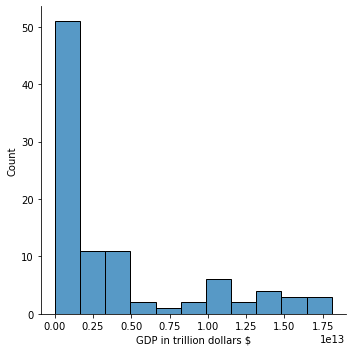

In [20]:
#GDP
plt.figure(figsize=(8,6))
sns.displot(data_who.GDP, kde=False)
plt.xlabel("GDP in trillion dollars $")
plt.show()
plt.clf()

<Figure size 576x432 with 0 Axes>

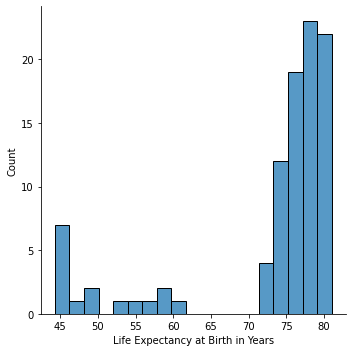

<Figure size 432x288 with 0 Axes>

In [24]:
#Life expectancy
plt.figure(figsize=(8,6))
sns.displot(data_who.leb, kde=False)
plt.xlabel("Life Expectancy at Birth in Years")
plt.show()
plt.clf()

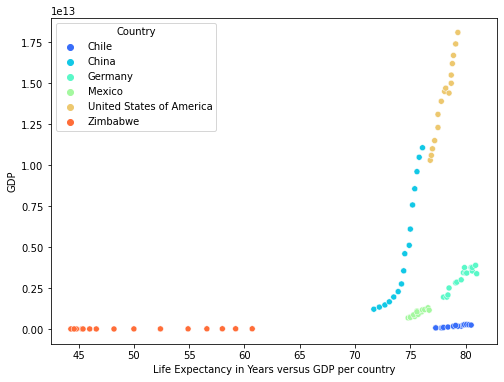

<Figure size 432x288 with 0 Axes>

In [25]:
#life expectancy between countries
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_who.leb, y=data_who.GDP, hue=data_who.Country, palette='rainbow')
plt.xlabel("Life Expectancy in Years versus GDP per country")
plt.show()
plt.clf()

From initial scatterplot with all countries we see that there seems to be a relationship between life_expectancy at birth and GDP.
The plot also shows and increase in both life expectancy and GDP, except for Zimbabwe.
The 2 countries with the highest GDP have a similar life expectancy as countries with a lower GDP.  

*We will need additional analysis to see what is going on with Zimbabwe*.

The distribution for the GPD is skewed to the left and the distribution of life expectancy is skewed right. 

In [27]:
# explore the means
data_mean = data_who.drop('Year', axis=1).groupby("Country").mean().reset_index()
data_mean

,Country,leb,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


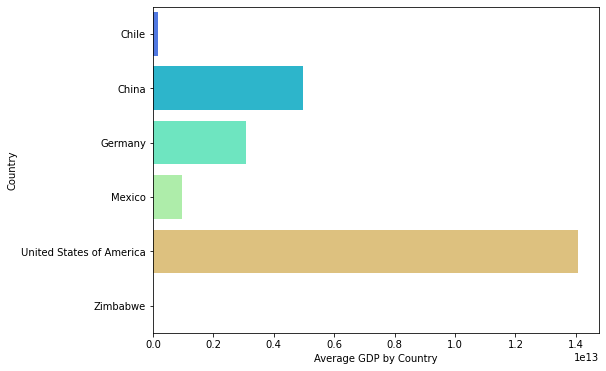

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=data_mean, palette='rainbow')
plt.xlabel("Average GDP by Country")
plt.show()

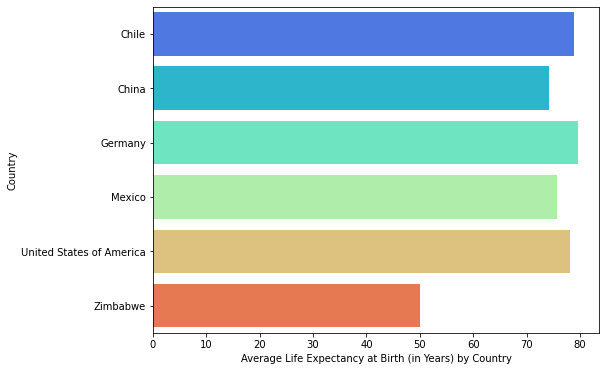

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x="leb", y="Country", data=data_mean, palette='rainbow')
plt.xlabel("Average Life Expectancy at Birth (in Years) by Country")
plt.show()

It's good to also look at how the GDP and life expectancy are distributed in each country. Boxplots or better violinplots are a good way to show the distribution. 
With a line chart for the countries you can see if there is any increase in both GPD and life expectancy. 

Text(0.5, 0, 'Life Expectancy distribution per Country')

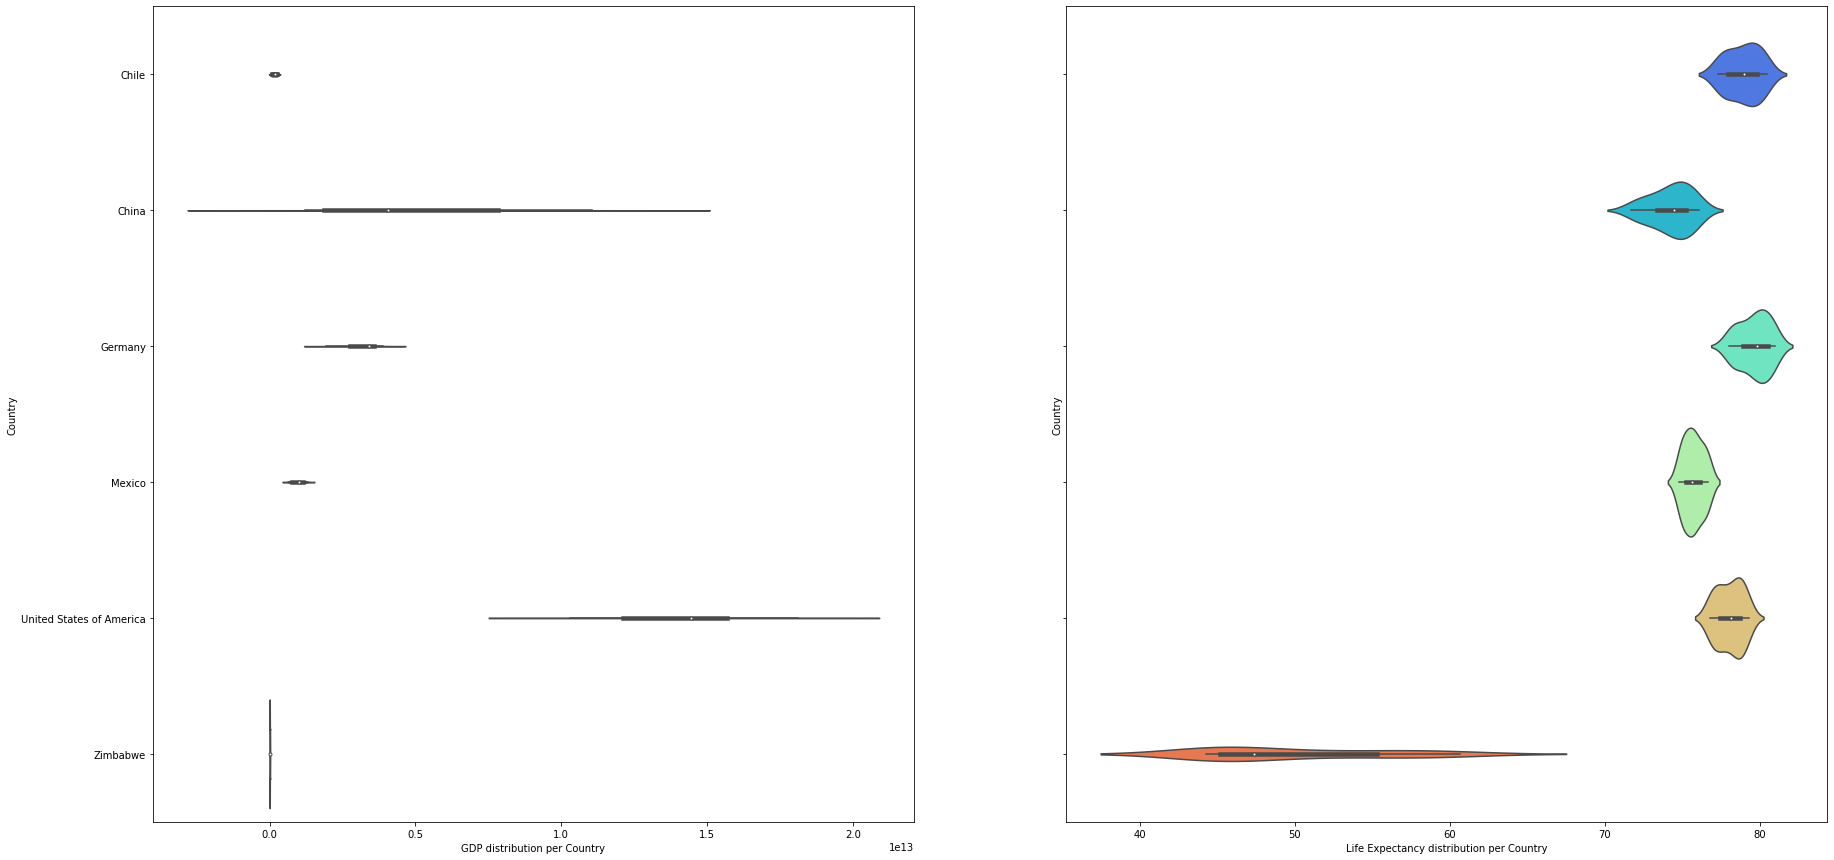

In [37]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(30,15))
axes[0] =sns.violinplot(ax=axes[0], x=data_who.GDP, y=data_who.Country, palette="rainbow")
axes[0].set_xlabel("GDP distribution per Country")
axes[1] =sns.violinplot(ax=axes[1], x=data_who.leb, y=data_who.Country, palette="rainbow")
axes[1].set_xlabel("Life Expectancy distribution per Country")

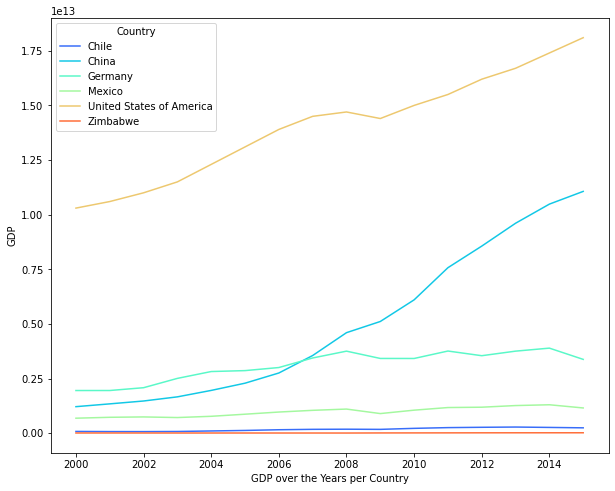

In [38]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data_who, x="Year", y="GDP", hue="Country", palette="rainbow")
plt.xlabel("GDP over the Years per Country")
plt.show()

Now we look closely at each country in a separate graph.

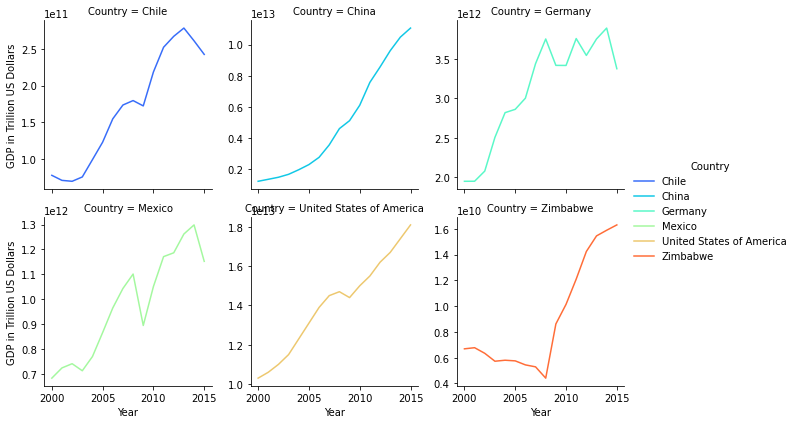

In [48]:
gdp = sns.FacetGrid(data_who, col="Country", col_wrap=3, hue="Country", margin_titles= True, sharey=False, palette="rainbow")
gdp.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in Trillion US Dollars")

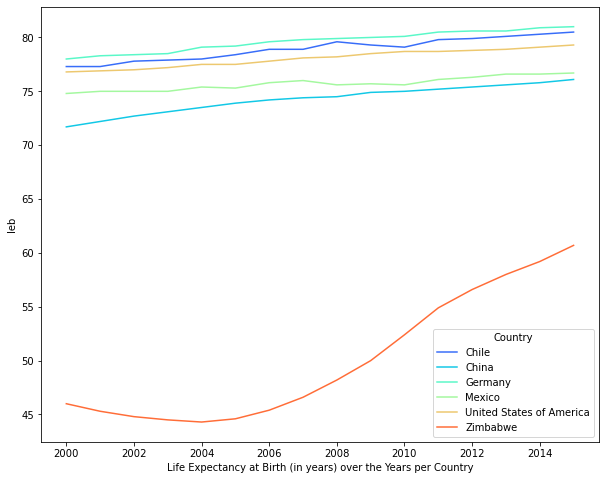

In [39]:
plt.figure(figsize=(10,8))
sns.lineplot(data=data_who, x="Year", y="leb", hue="Country", palette="rainbow")
plt.xlabel("Life Expectancy at Birth (in years) over the Years per Country")
plt.show()

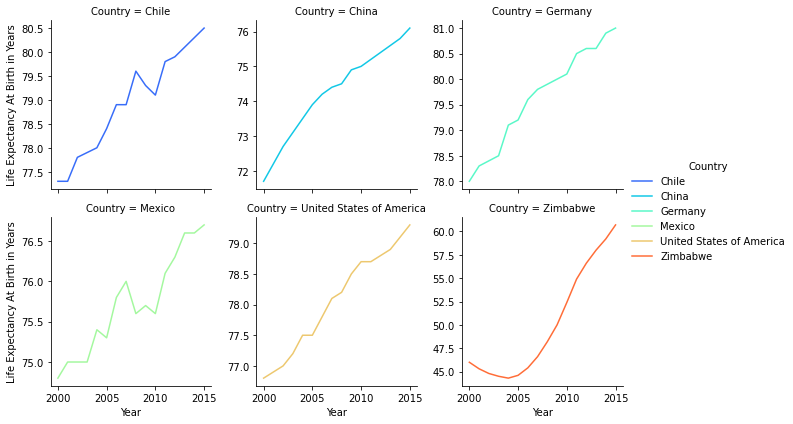

In [50]:
year = sns.FacetGrid(data_who, col="Country", col_wrap=3, hue="Country", margin_titles= True, sharey=False, palette="rainbow")
year.map(sns.lineplot, "Year", "leb").add_legend().set_axis_labels("Year", "Life Expectancy At Birth in Years")

We've already made a scatterplot with all countries before. Now lets look at each country separately.

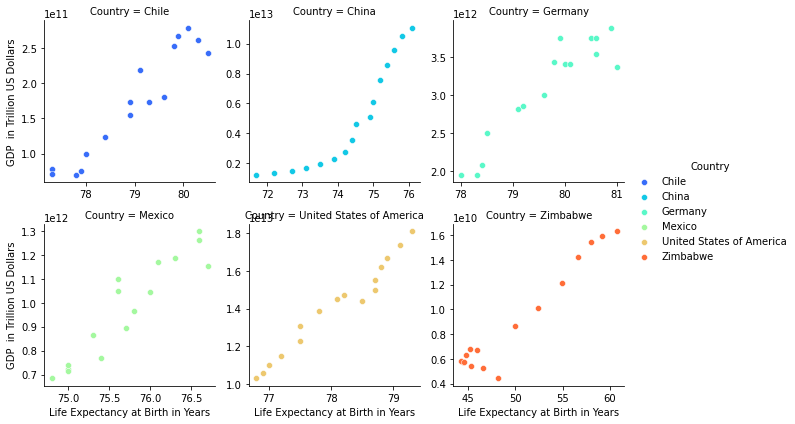

In [58]:
scatt = sns.FacetGrid(data_who, col="Country", col_wrap=3, hue="Country", margin_titles= True, sharey=False, palette="rainbow", sharex=False)
scatt.map(sns.scatterplot, "leb", "GDP").add_legend().set_axis_labels("Life Expectancy at Birth in Years", "GDP  in Trillion US Dollars")


## Conclusions

There seems to be a correlation between GDP and life expectancy at birth. An increase in GDP also shows an increase in the life expectancy for all countries analysed. Zimbabwe looks to be behind and in a graph with other countries shows no correlation between the GDP and life expectancy, but separate analysis shows a correlation. China shows to have a steady increase in both GDP and life expectancy. 

#### Answers to the questions
- Has life expectancy increased over time in the six nations?
Yes it has increased over time in the six nations
- Has GDP increased over time in the six nations?
Yes it has increased over time in the six nations
- Is there a correlation between GDP and life expectancy of a country?
Yes there is a correlation between GDP and life expectancy, higher GDP means higher life expectancy
- What is the average life expectancy in these nations?
The average life expectancy is between 74 and 80 years, with the exception of Zimbabwe where it is 50 years.
- What is the distribution of that life expectancy?
The distribution is left-skew, with most observations on the right side. 